**TIME SERIES ANALYSIS ASSIGNMENT - GROUP 7**

* *Đỗ Thị Hương Trà - BA12-174*
* *Đào Hoàng Dũng - 22BI13101*
* *Nguyễn Ngọc Nhi - 22BI13351*
* *Lê Duy Anh - 22BI13017*
* *Đỗ Duy Minh - 22BI13280*
* *Nguyễn Đức Huy - 22BI13193*

Our group is working with the Paris temperature dataset in the course. We analyze the dataset and apply time series models such as SARIMA, Prophet, Out-of-Sample, and LSTM.

# Exercise 1:
Preprocess the data set to make sure that you have a good *datetime*
column. Check it by plotting the Paris temperature column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/time_series/paris_temperature.csv")

# Convert the 'datetime' column to datetime objects.  The errors='coerce' argument handles any invalid dates by setting them to NaT (Not a Time).
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Check for any invalid dates (NaT values)
invalid_dates = df[df['datetime'].isnull()]
if not invalid_dates.empty:
    print("Warning: Invalid dates found in the dataset:")
    print(invalid_dates)

# Save cleaned data to a CSV file
df.to_csv("cleaned_paris_temperature.csv", index=False)

# Display the DataFrame with the processed datetime column
print(df.head()) #Shows the first few rows to verify

           name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France 2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France 2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France 2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France 2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France 2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1          1

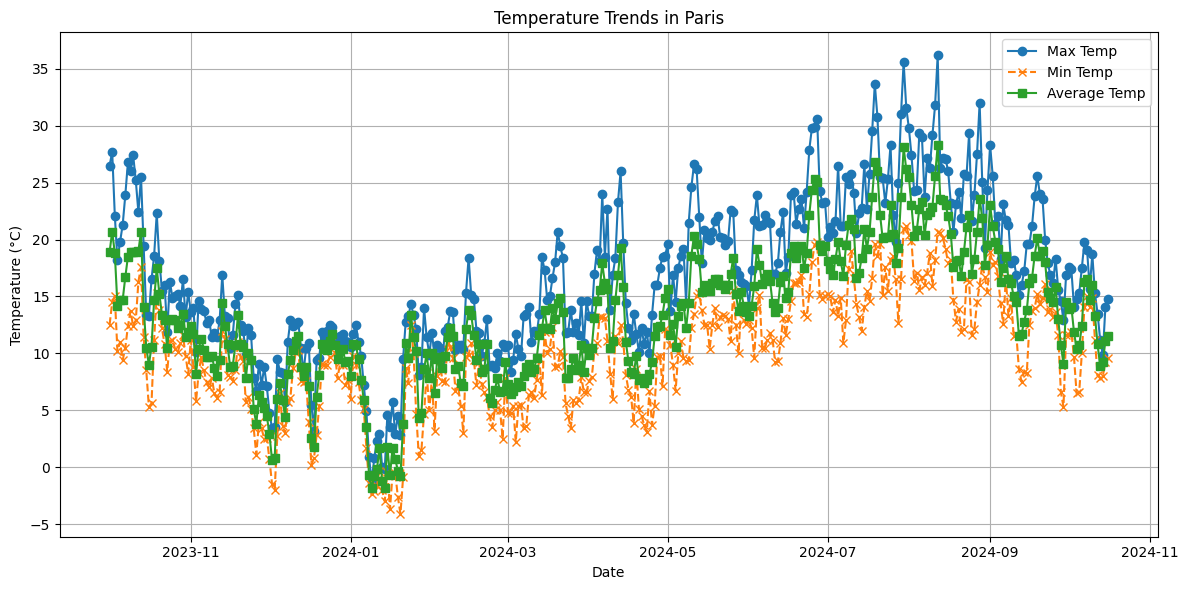

In [3]:
# Plot temperature data over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['tempmax'], label='Max Temp', marker='o', linestyle='-')
plt.plot(df['datetime'], df['tempmin'], label='Min Temp', marker='x', linestyle='--')
plt.plot(df['datetime'], df['temp'], label='Average Temp', marker='s', linestyle='-')
plt.title('Temperature Trends in Paris')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

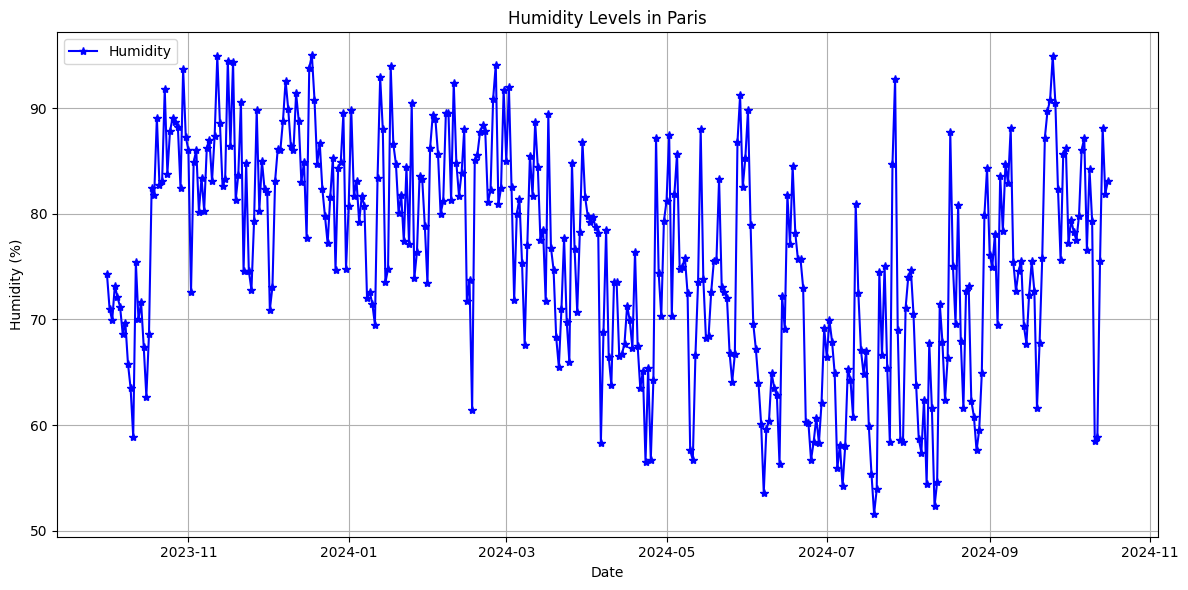

In [ ]:
# Plot humidity over time
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['humidity'], label='Humidity', color='blue', marker='*')
plt.title('Humidity Levels in Paris')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

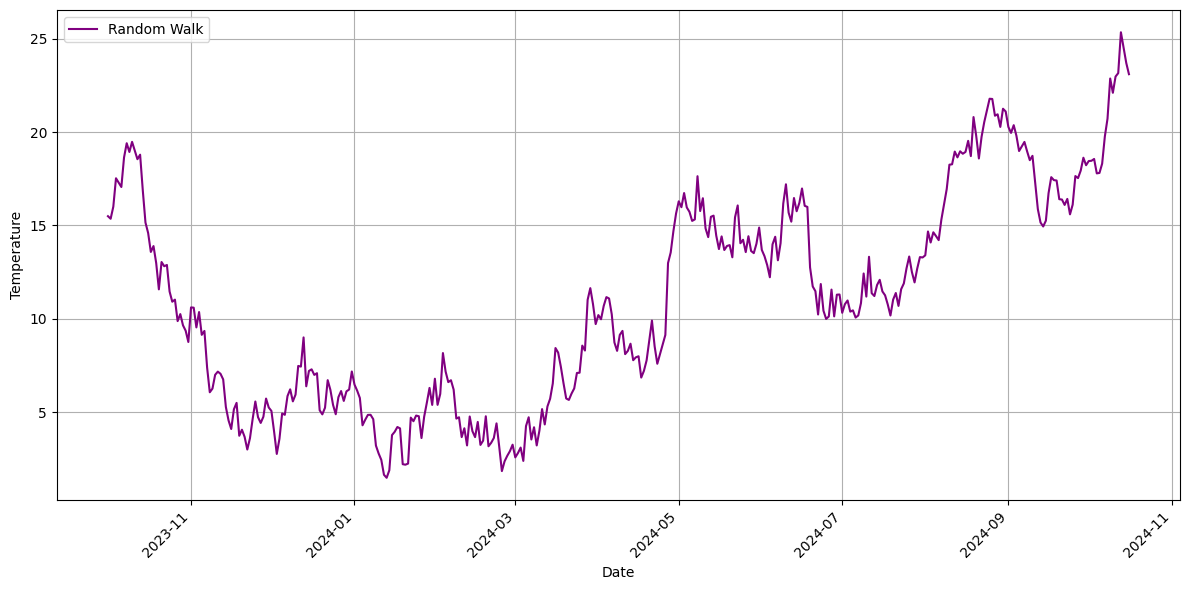

In [ ]:
# Generate a random walk
np.random.seed(42)  # for reproducibility
random_walk = np.cumsum(np.random.randn(len(df)))

# Plot only the random walk
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], random_walk + 15, label='Random Walk', linestyle='-', color='purple') #Added constant for better visualization

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Exercise 2
The dataset has 33 columns (features). Explain the meaning and values in each column.

    For example, what does feature “moonphase” mean? What are its values?


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('cleaned_paris_temperature.csv')

# Display the first few rows
print(df.head())

# Display the data types and non-null counts for each column
print(df.info())

           name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  Paris,France  2023-10-01     26.5     12.5  18.9          26.5   
1  Paris,France  2023-10-02     27.7     14.5  20.7          27.9   
2  Paris,France  2023-10-03     22.1     15.0  18.8          22.1   
3  Paris,France  2023-10-04     18.2     10.2  14.2          18.2   
4  Paris,France  2023-10-05     19.8     11.0  14.7          19.8   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          12.5       18.9  13.7      74.3  ...          3.5        3   
1          14.5       20.7  14.7      71.0  ...          4.4        4   
2          15.0       18.8  13.0      69.9  ...          4.8        4   
3          10.2       14.2   9.3      73.2  ...          5.1        4   
4          11.0       14.7   9.4      72.1  ...          3.5        3   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-10-01T07:49:34  2023-10-01T19:30:27       0.57   
1     

## Meaning & Value of each column

| **Column Name**         | **Description**                                                                                                                 | **Typical Values**                                   |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------|
| **name**                | Location name where the weather data was collected. Useful in multi-location datasets or to confirm location context.           | "Paris, France"                                     |
| **datetime**            | Date of the observation in datetime format. Helps in analyzing weather trends over time.                                        | "2023-10-01"                                        |
| **tempmax**             | Maximum temperature recorded during the day in degrees Celsius, indicating the peak warmth for the day.                        | 10.0 to 35.0                                        |
| **tempmin**             | Minimum temperature recorded during the day in degrees Celsius, showing the lowest temperature.                                | -5.0 to 25.0                                        |
| **temp**                | Average daily temperature in degrees Celsius. Represents the mean temperature throughout the day.                              | 5.0 to 30.0                                         |
| **feelslikemax**        | Maximum perceived temperature (feels-like) in degrees Celsius, accounting for wind chill and humidity.                         | 10.0 to 35.0                                        |
| **feelslikemin**        | Minimum perceived temperature (feels-like) in degrees Celsius, providing insight into perceived coldest conditions.            | -5.0 to 25.0                                        |
| **feelslike**           | Average perceived temperature in degrees Celsius. Takes into account both wind chill and humidity for a more accurate feel.    | 5.0 to 30.0                                         |
| **dew**                 | Dew point temperature in degrees Celsius, showing the temperature at which air becomes saturated with moisture.                | 0.0 to 20.0                                         |
| **humidity**            | Relative humidity percentage, showing the air's moisture level, with higher values indicating more moisture.                   | 30 to 100                                           |
| **precip**              | Total precipitation in millimeters, providing the total rainfall or snowfall for the day.                                      | 0.0 to 100.0                                        |
| **precipprob**          | Probability of precipitation as a percentage, indicating the chance of rain or snow occurring during the day.                  | 0 to 100                                            |
| **precipcover**         | Percentage of time precipitation was present during the day, describing the duration of rain or snow.                          | 0 to 100                                            |
| **preciptype**          | Type of precipitation (rain, snow, etc.). Helps classify the form of precipitation for specific weather conditions.            | "rain", "snow"                                      |
| **snow**                | Total snowfall in millimeters, indicating the amount of snow accumulated during the day.                                       | 0.0 to 50.0                                         |
| **snowdepth**           | Snow depth in millimeters, representing the cumulative depth of snow on the ground.                                            | 0.0 to 200.0                                        |
| **windgust**            | Maximum wind gust speed in kilometers per hour, measuring sudden, short bursts of high wind.                                   | 0.0 to 100.0                                        |
| **windspeed**           | Average wind speed in kilometers per hour, providing an overview of general windiness during the day.                          | 0.0 to 50.0                                         |
| **winddir**             | Average wind direction in degrees (0 to 360), indicating the prevailing wind direction.                                        | 0 to 360                                            |
| **sealevelpressure**    | Sea-level pressure in hPa, useful for understanding atmospheric pressure patterns that affect weather conditions.              | 950 to 1050                                         |
| **cloudcover**          | Average cloud cover percentage, showing the extent of cloudiness throughout the day.                                           | 0 to 100                                            |
| **visibility**          | Average visibility distance in kilometers, showing how clear or obstructed the view is (e.g., fog reduces visibility).         | 1.0 to 20.0                                         |
| **solarradiation**      | Average solar radiation in watts per square meter (W/m²), indicating the strength of solar energy reaching the surface.       | 0 to 1000                                           |
| **solarenergy**         | Total solar energy in megajoules per square meter (MJ/m²) received throughout the day. Useful for solar energy analysis.       | 0.0 to 30.0                                         |
| **uvindex**             | Maximum UV index for the day, indicating the level of ultraviolet radiation and potential risk of sunburn.                    | 0 to 10                                             |
| **severerisk**          | Index from 0 to 10 representing the risk of severe weather, with higher values indicating more hazardous conditions.          | 0 to 10                                             |
| **sunrise**             | Time of sunrise in ISO format, providing the exact time the sun rises, which can vary with seasons.                           | "2023-10-01T07:49:34"                               |
| **sunset**              | Time of sunset in ISO format, indicating when the sun sets, which is essential for calculating daylight hours.                 | "2023-10-01T19:30:27"                               |
| **moonphase**           | Numeric representation of the moon phase, where 0 = new moon and 0.5 = full moon, affecting nighttime lighting.               | 0.0 to 1.0                                          |
| **conditions**          | Brief summary of weather conditions, describing general weather patterns like rain or cloudiness.                             | "Rain, Partially cloudy"                            |
| **description**         | Detailed text explaining the day’s weather, providing context about specific events like "morning showers."                   | "Partly cloudy with morning showers"                |
| **icon**                | Icon code representing the weather visually (e.g., “rain”, “partly-cloudy-day”), useful for quick weather snapshots.          | "rain", "partly-cloudy-day"                         |
| **stations**            | List of weather station IDs that provided data for the day, showing data sources for verification or comparison.             | "07149099999, 07156099999"                          |


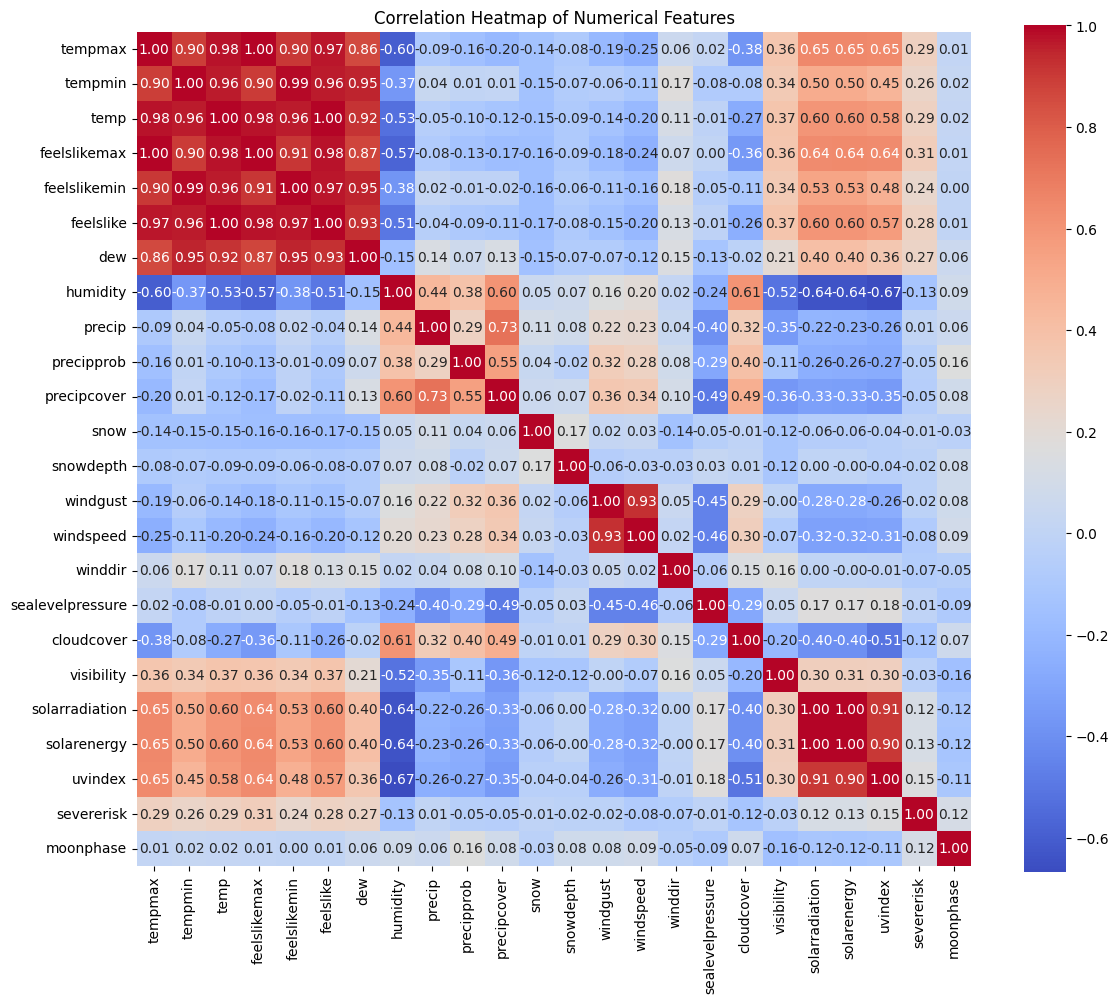

In [ ]:
# Compute correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


# Exercise 3:
Determine numerical features and categorical features.

In [ ]:
# Identify numerical features (int64 and float64 data types)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Features:", numerical_features)

# Identify categorical features (object data type)
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)


Numerical Features: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']
Categorical Features: ['name', 'datetime', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']


In [ ]:
# Display summary statistics for numerical features
print(df[numerical_features].describe())

          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  382.000000  382.000000  382.000000    382.000000    382.000000   
mean    16.802356   10.096859   13.279319     16.541623      8.974869   
std      6.840083    5.057506    5.819955      7.388110      6.197290   
min     -1.300000   -4.100000   -1.800000     -5.500000     -7.300000   
25%     11.800000    6.625000    9.300000     11.800000      4.600000   
50%     16.150000   10.200000   13.050000     16.150000     10.200000   
75%     21.850000   13.600000   17.575000     21.850000     13.600000   
max     36.200000   21.200000   28.300000     39.000000     21.200000   

        feelslike         dew    humidity      precip  precipprob  ...  \
count  382.000000  382.000000  382.000000  382.000000  382.000000  ...   
mean    12.624346    8.784293   76.118586    2.053552   71.432461  ...   
std      6.674208    4.779705   10.214621    3.939574   44.425978  ...   
min     -6.300000   -6.100000   51.600000    0

In [ ]:
# Display unique values for categorical features to understand their categories
for col in categorical_features:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'name':
['Paris,France']

Unique values in 'datetime':
['2023-10-01' '2023-10-02' '2023-10-03' '2023-10-04' '2023-10-05'
 '2023-10-06' '2023-10-07' '2023-10-08' '2023-10-09' '2023-10-10'
 '2023-10-11' '2023-10-12' '2023-10-13' '2023-10-14' '2023-10-15'
 '2023-10-16' '2023-10-17' '2023-10-18' '2023-10-19' '2023-10-20'
 '2023-10-21' '2023-10-22' '2023-10-23' '2023-10-24' '2023-10-25'
 '2023-10-26' '2023-10-27' '2023-10-28' '2023-10-29' '2023-10-30'
 '2023-10-31' '2023-11-01' '2023-11-02' '2023-11-03' '2023-11-04'
 '2023-11-05' '2023-11-06' '2023-11-07' '2023-11-08' '2023-11-09'
 '2023-11-10' '2023-11-11' '2023-11-12' '2023-11-13' '2023-11-14'
 '2023-11-15' '2023-11-16' '2023-11-17' '2023-11-18' '2023-11-19'
 '2023-11-20' '2023-11-21' '2023-11-22' '2023-11-23' '2023-11-24'
 '2023-11-25' '2023-11-26' '2023-11-27' '2023-11-28' '2023-11-29'
 '2023-11-30' '2023-12-01' '2023-12-02' '2023-12-03' '2023-12-04'
 '2023-12-05' '2023-12-06' '2023-12-07' '2023-12-08' '2023-12-09'
 '20

# Exercise 4:

## a. SARIMA model
Applying SARIMA model (p,d,q)(P,D,Q)m. Determine the differencing order. Find the best possible parameters (p,d,q) (P,D,Q), m in terms of AIC metrics and Root Mean Squared Error (RMSE) (on testset). Present the result clearly with AIC, Loglikelihood, BIC, RMSE, R2, MAPE for the best model.

In [ ]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Load data
data_4a = pd.read_csv('paris_temperature.csv')

In [ ]:
data_4a = data_4a[['temp','datetime']]  # Focus on the main temperature column for forecasting
data_4a = data_4a.dropna()

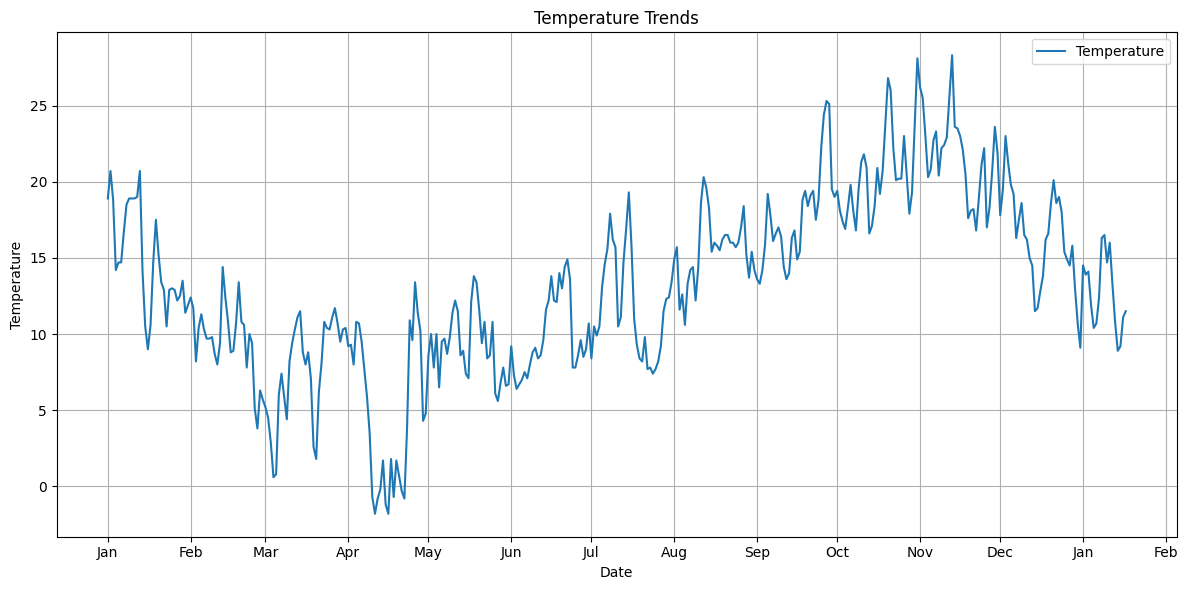

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


plt.figure(figsize=(12, 6))
plt.plot(data_4a['datetime'], data_4a['temp'], label="Temperature")

# Set x-axis major locator to month and formatter to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trends")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

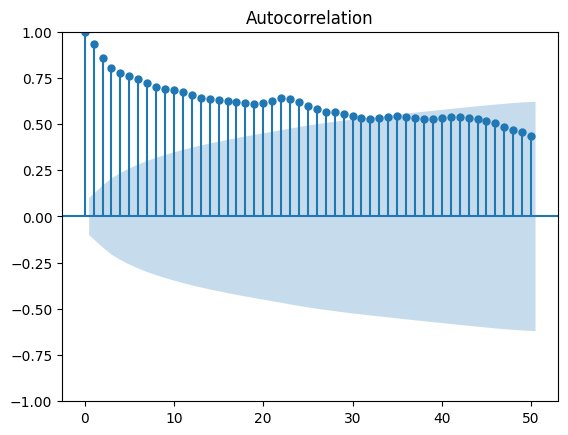

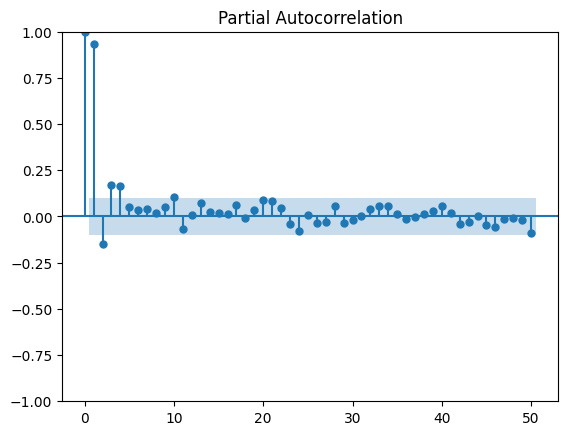

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the data
plot_acf(data_4a['temp'], lags=50)
plot_pacf(data_4a['temp'], lags=50)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'data' has datetime index and 'temp' column
data_4a['datetime'] = pd.to_datetime(data_4a['datetime'])
data_4a.set_index('datetime', inplace=True)

# Split data into train and test sets
train = data_4a['2023-10-01':'2024-09-15']['temp']
test = data_4a['2024-09-16':]['temp']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume train and test are already defined
scaler = MinMaxScaler()

# Fit and transform the train set
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
train_scaled = pd.Series(train_scaled.flatten(), index=train.index)

# Transform the test set
test_scaled = scaler.transform(test.values.reshape(-1, 1))
test_scaled = pd.Series(test_scaled.flatten(), index=test.index)


In [ ]:
!pip install optuna


In [ ]:
import optuna

def sarima_objective(trial):
    # Define the parameter ranges
    p = trial.suggest_int("p", 0, 3)
    d = trial.suggest_int("d", 0, 2)
    q = trial.suggest_int("q", 0, 3)
    P = trial.suggest_int("P", 0, 3)
    D = trial.suggest_int("D", 0, 2)
    Q = trial.suggest_int("Q", 0, 3)
    m = trial.suggest_int("m", 7, 7)  # weekly seasonality

    try:
        # Define SARIMA model
        model = SARIMAX(
            train,
            order=(p, d, q),
            seasonal_order=(P, D, Q, m),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        result = model.fit(disp=False)

        # Make predictions on the test set
        predictions = result.predict(start=test.index[0], end=test.index[-1])

        # Compute RMSE
        rmse = np.sqrt(mean_squared_error(test, predictions))
        return rmse  # Minimize RMSE

    except Exception as e:
        return float("inf")  # Handle errors gracefully


In [ ]:
# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Optimize the SARIMA parameters
study.optimize(sarima_objective, n_trials=50)

# Print the best parameters
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)


[I 2024-11-20 15:27:55,257] A new study created in memory with name: no-name-602a03e8-bc67-4cc6-b502-ae1c1550799b
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
[I 2024-11-20 15:27:58,329] Trial 0 finished with value: 27.032308151305095 and parameters: {'p': 3, 'd': 2, 'q': 1, 'P': 2, 'D': 2, 'Q': 0, 'm': 7}. Best is trial 0 with value: 27.032308151305095.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Val

Best Parameters: {'p': 2, 'd': 0, 'q': 3, 'P': 1, 'D': 1, 'Q': 3, 'm': 7}
Best RMSE: 2.8692011047844437


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
best_params = study.best_params

# Fit SARIMA model with the best parameters
best_model = SARIMAX(
    train,
    order=(best_params["p"], best_params["d"], best_params["q"]),
    seasonal_order=(best_params["P"], best_params["D"], best_params["Q"], best_params["m"]),
    enforce_stationarity=False,
    enforce_invertibility=False
)
result = best_model.fit(disp=False)

# Predictions
predictions = result.predict(start=test.index[0], end=test.index[-1])

# Evaluate the best model
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)
mape = mean_absolute_percentage_error(test, predictions) * 100

# Extract AIC, BIC, Log-Likelihood
aic = result.aic
bic = result.bic
log_likelihood = result.llf

# Print all evaluation metrics
print(f"Model Evaluation Metrics:")
print(f"-----------------------------------")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")
print(f"Log-Likelihood: {log_likelihood:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model Evaluation Metrics:
-----------------------------------
AIC: 1371.5425
BIC: 1409.1944
Log-Likelihood: -675.7713
Root Mean Squared Error (RMSE): 2.8692
R² Score: 0.1367
Mean Absolute Percentage Error (MAPE): 18.14%


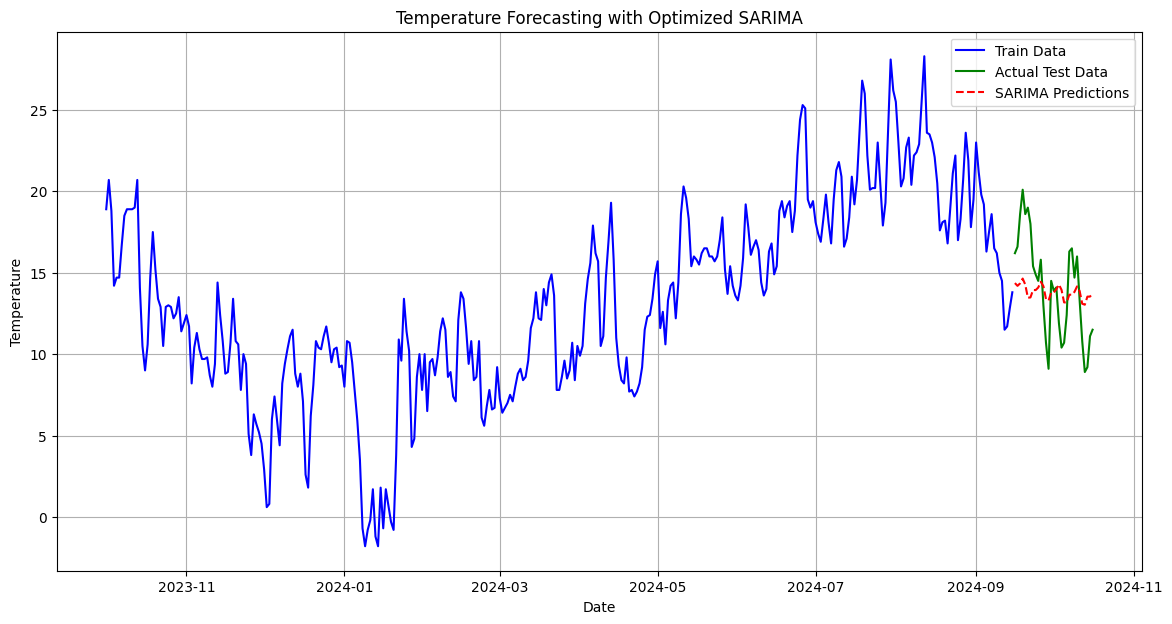

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label="Train Data", color="blue")
plt.plot(test.index, test, label="Actual Test Data", color="green")
plt.plot(predictions.index, predictions, label="SARIMA Predictions", color="red", linestyle="--")
plt.title("Temperature Forecasting with Optimized SARIMA")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


## b. Prophet model
Use Prophet model and do the same task. Try different setting for Prophet to get the best result.

In [ ]:
data_b = pd.read_csv('/content/paris_temperature.csv')


In [ ]:
df_prophet =data_b[['datetime', 'temp']].rename(columns={'datetime':'ds', 'temp':'y'})
df_prophet.head(2)

ds     y
0  2023-10-01  18.9
1  2023-10-02  20.7

In [ ]:
len(df_prophet)

382

In [ ]:
print(df_prophet.ds.min(), df_prophet.ds.max())

2023-10-01 2024-10-16


In [ ]:
train_prophet = df_prophet.iloc[:-30]
test_prophet = df_prophet.iloc[-30:]

In [ ]:
print(len(test_prophet), len(train_prophet))

30 352


In [ ]:
from prophet import Prophet

model_prophet = Prophet()
model_prophet.fit(train_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnedtfarc/0orqsltn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnedtfarc/48ltztzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56943', 'data', 'file=/tmp/tmpnedtfarc/0orqsltn.json', 'init=/tmp/tmpnedtfarc/48ltztzc.json', 'output', 'file=/tmp/tmpnedtfarc/prophet_modeln2pahmi8/prophet_model-20241120153529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:35:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
periods_to_test = [7, 14, 30]  # Adjust based on your needs
validation_results = []
for period in periods_to_test:
    print(f"Testing with forecast period: {period} days")

    # Create future dataframe with the specified period
    future = model_prophet.make_future_dataframe(periods=period)

    # Forecast
    forecast = model_prophet.predict(future)

    # Extract the test forecast (last 30 days of the forecast)
    test_forecast = forecast.iloc[-30:]  # Align with test_prophet
    y_pred = test_forecast['yhat'].values
    y_true = test_prophet['y'].values

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE for period {period}: {rmse:.4f}")

    # Store results
    validation_results.append({'period': period, 'RMSE': rmse})

# Find the best period based on RMSE
best_period = min(validation_results, key=lambda x: x['RMSE'])
print(f"\nBest period: {best_period['period']} days with RMSE: {best_period['RMSE']:.4f}")


Testing with forecast period: 7 days
RMSE for period 7: 8.0800
Testing with forecast period: 14 days
RMSE for period 14: 8.3785
Testing with forecast period: 30 days
RMSE for period 30: 9.0345

Best period: 7 days with RMSE: 8.0800


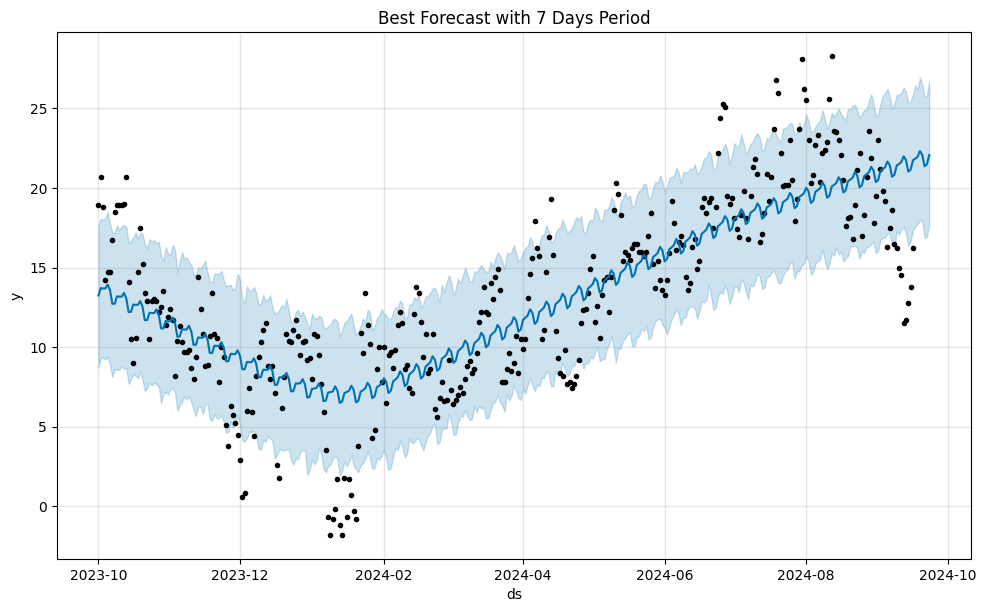

In [ ]:
# Use the best period for final forecasting
final_future = model_prophet.make_future_dataframe(periods=best_period['period'])
final_forecast = model_prophet.predict(final_future)

# Plot the final forecast
fig = model_prophet.plot(final_forecast)
plt.title(f"Best Forecast with {best_period['period']} Days Period")
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnedtfarc/yutmi3l5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnedtfarc/1noxhewb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62470', 'data', 'file=/tmp/tmpnedtfarc/yutmi3l5.json', 'init=/tmp/tmpnedtfarc/1noxhewb.json', 'output', 'file=/tmp/tmpnedtfarc/prophet_model97fsxj_1/prophet_model-20241120153608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Root Mean Squared Error (RMSE): 3.6958
Mean Absolute Error (MAE): 3.1214
R² Score: -0.4082


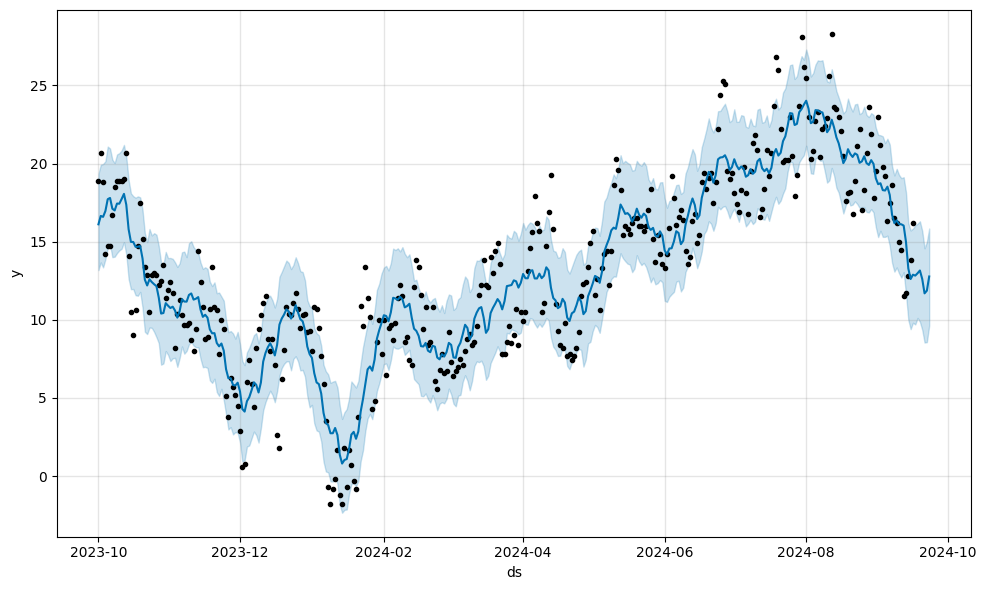

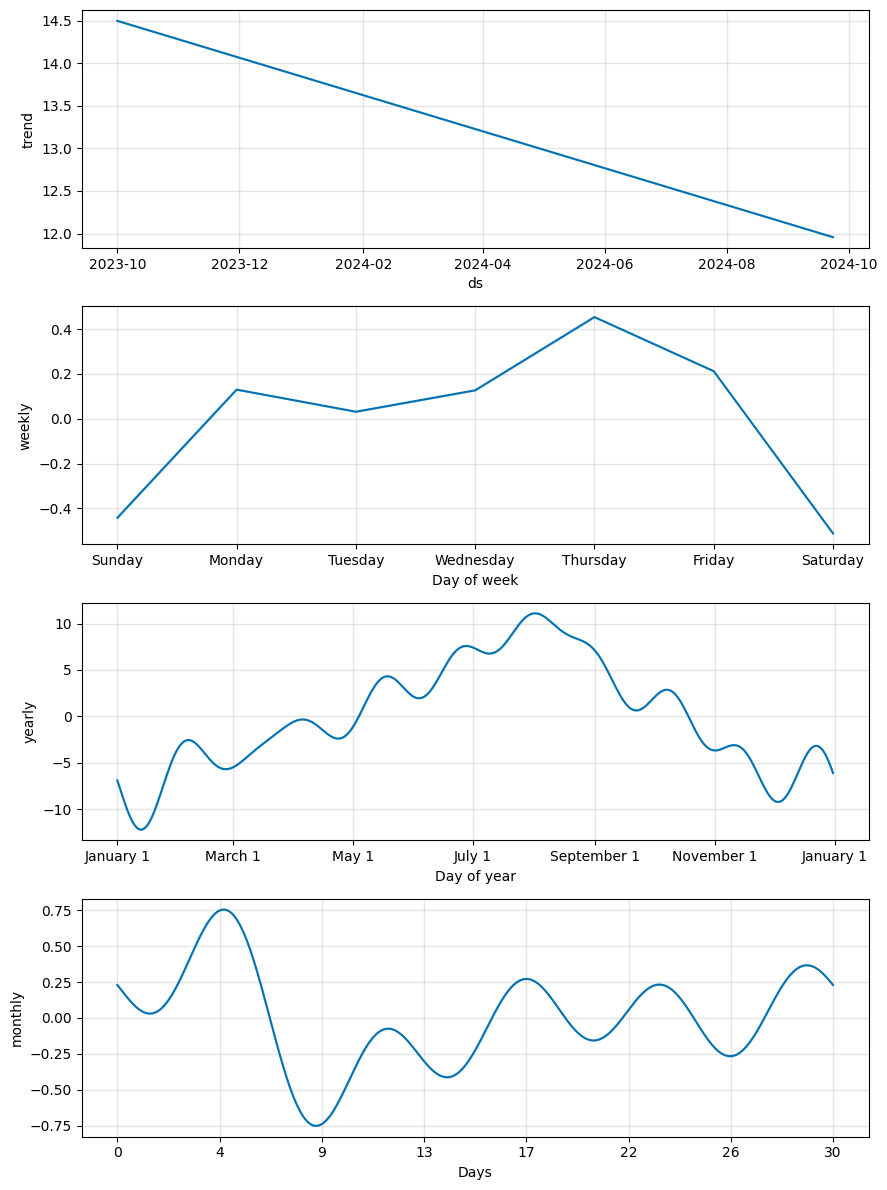

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming your data is in `df_prophet` with columns ['ds', 'y']
# Split the data into training and testing
train_prophet_1 = df_prophet.iloc[:-30]
test_prophet_1 = df_prophet.iloc[-30:]

# Initialize the Prophet model with custom parameters
model_prophet_1 = Prophet(
    changepoint_prior_scale=0.1,  # Controls trend flexibility
    seasonality_prior_scale=0.1,  # Controls seasonality flexibility
    yearly_seasonality=True  # Assumes yearly seasonality is significant
)

# Add additional seasonality if needed (e.g., monthly seasonality)
model_prophet_1.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model to the training data
model_prophet_1.fit(train_prophet_1)

# Create a future dataframe for predictions
future = model_prophet_1.make_future_dataframe(periods=7)  # Forecast next 7 days
forecast = model_prophet_1.predict(future)

# Extract predictions for the test set
test_forecast = forecast.iloc[-30:]  # Matching last 30 days of test set

# Evaluate the model
y_true = test_prophet['y'].values
y_pred = test_forecast['yhat'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the forecast
fig1 = model_prophet_1.plot(forecast)

# Plot forecast components (trend and seasonality)
fig2 = model_prophet_1.plot_components(forecast)




In [ ]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2023-10-01  14.500326   13.179080   19.342369    14.500326    14.500326   
1   2023-10-02  14.493223   13.673277   19.928012    14.493223    14.493223   
2   2023-10-03  14.486119   13.356513   19.972077    14.486119    14.486119   
3   2023-10-04  14.479016   13.883603   20.151101    14.479016    14.479016   
4   2023-10-05  14.471913   14.597424   21.091517    14.471913    14.471913   
..         ...        ...         ...         ...          ...          ...   
354 2024-09-19  11.985843    9.874093   16.309871    11.985843    11.985843   
355 2024-09-20  11.978740    9.361042   15.696180    11.978740    11.978740   
356 2024-09-21  11.971637    8.546517   14.578592    11.971637    11.971637   
357 2024-09-22  11.964534    8.573189   14.987216    11.964534    11.964534   
358 2024-09-23  11.957431    9.621790   15.847756    11.957431    11.957431   

     additive_terms  additive_terms_lower  additive_terms_upper   monthly  \
0          1.614699              1.614699              1.614699  0.134611   
1          2.156893              2.156893              2.156893 -0.111581   
2          2.106031              2.106031              2.106031 -0.264793   
3          2.486421              2.486421              2.486421 -0.158264   
4          3.249514              3.249514              3.249514  0.129498   
..              ...                   ...                   ...       ...   
354        1.172110              1.172110              1.172110 -0.102363   
355        0.634779              0.634779              0.634779 -0.286994   
356       -0.276202             -0.276202             -0.276202 -0.413036   
357       -0.095478             -0.095478             -0.095478 -0.291624   
358        0.817579              0.817579              0.817579  0.011095   

     ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0    ... -0.442630     -0.442630     -0.442630  1.922719      1.922719   
1    ...  0.130072      0.130072      0.130072  2.138403      2.138403   
2    ...  0.031386      0.031386      0.031386  2.339438      2.339438   
3    ...  0.126899      0.126899      0.126899  2.517785      2.517785   
4    ...  0.454052      0.454052      0.454052  2.665963      2.665963   
..   ...       ...           ...           ...       ...           ...   
354  ...  0.454052      0.454052      0.454052  0.820421      0.820421   
355  ...  0.212441      0.212441      0.212441  0.709333      0.709333   
356  ... -0.512220     -0.512220     -0.512220  0.649053      0.649053   
357  ... -0.442630     -0.442630     -0.442630  0.638776      0.638776   
358  ...  0.130072      0.130072      0.130072  0.676413      0.676413   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        1.922719                   0.0                         0.0   
1        2.138403                   0.0                         0.0   
2        2.339438                   0.0                         0.0   
3        2.517785                   0.0                         0.0   
4        2.665963                   0.0                         0.0   
..            ...                   ...                         ...   
354      0.820421                   0.0                         0.0   
355      0.709333                   0.0                         0.0   
356      0.649053                   0.0                         0.0   
357      0.638776                   0.0                         0.0   
358      0.676413                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  16.115025  
1                           0.0  16.650116  
2                           0.0  16.592150  
3                           0.0  16.965437  
4                           0.0  17.721427  
..                          ...        ...  
354                         0.0  13.157952  
355                         0.0  12.

In [ ]:
forecast_prophet_test = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_prophet_test

ds       yhat  yhat_lower  yhat_upper
0   2023-10-01  16.115025   13.179080   19.342369
1   2023-10-02  16.650116   13.673277   19.928012
2   2023-10-03  16.592150   13.356513   19.972077
3   2023-10-04  16.965437   13.883603   20.151101
4   2023-10-05  17.721427   14.597424   21.091517
..         ...        ...         ...         ...
354 2024-09-19  13.157952    9.874093   16.309871
355 2024-09-20  12.613519    9.361042   15.696180
356 2024-09-21  11.695435    8.546517   14.578592
357 2024-09-22  11.869055    8.573189   14.987216
358 2024-09-23  12.775010    9.621790   15.847756

[359 rows x 4 columns]

# Exercise 5:
Choose and apply a Probabilistic Machine Learning model (Linear Regression, LightGBM Regressor, XGBoost Regressor) on these trainset and testset.

Out-Of-Sample split for the dataset = Split randomly 80-20 your dataset, Do not respect the evolution in time of your time series.

Hyper-parameter tuning as hard as you could (with Optuna or Grid Search) to get the best result.

Compute with RMSE. R2. MAPE metrics.


**In this part, I would love to use 3 models are : Linear Regression, LightGBM Regressor, XGBoost Regressor to compare and indicate the most suitable one.**




**Import and install things**

In [3]:
!pip install optuna
!pip install lightgbm
!pip install xgboost

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import optuna  # Optional for hyperparameter tuning
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Draw a heat map of the data before processing for the model

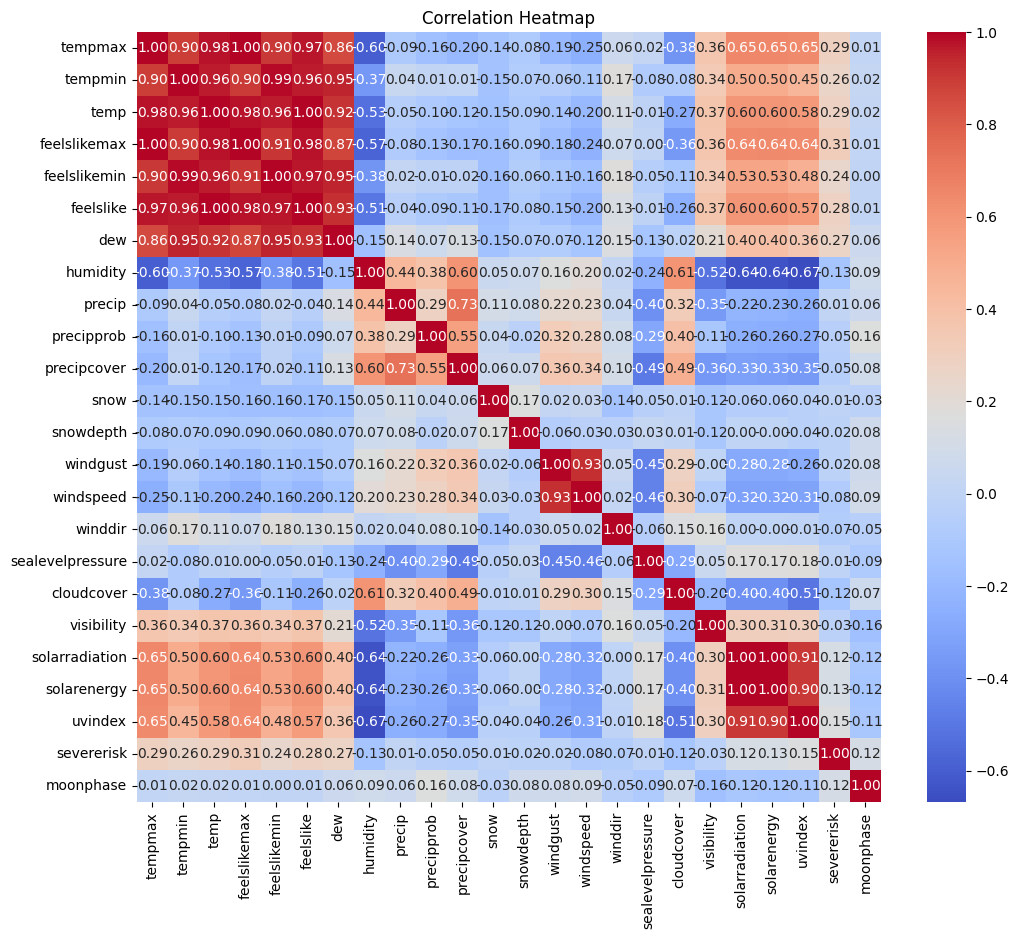

In [4]:
# Selecting numeric columns for correlation analysis
df_uncleaned = pd.read_csv("/content/cleaned_paris_temperature.csv")
numeric_columns = df_uncleaned.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

**Due to our ignorance on the time series in this session, I will preprocess one more time to be ready to use with models.**

In [5]:
df_cleaned = pd.read_csv('cleaned_paris_temperature.csv')
df_cleaned = df_cleaned.drop(columns=['datetime'])
df_cleaned = df_cleaned.drop(columns=['name'])

# Drop unnecessary columns that won’t be used for modeling
columns_to_drop = ['sunrise', 'sunset', 'description', 'icon', 'stations','dew', 'windspeed', 'feelslike', 'feelslikemin', 'tempmax', 'windgust', 'solarradiation', 'solarenergy', 'tempmin', 'feelslikemax', 'uvindex']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Drop non-numeric columns or encode them if needed
# For simplicity, let's drop columns like 'preciptype' and 'conditions'
df_cleaned = df_cleaned.drop(columns=['preciptype', 'conditions'], errors='ignore')

#Split the data

# Define features and target
target = 'temp'  # Define the target column
features = [col for col in df_cleaned.columns if col != target]

# Ensure all features are numeric
X = df_cleaned[features].select_dtypes(include=['number'])
y = df_cleaned[target]

# Split the data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Clean feature names in X
X.columns = X.columns.str.replace('[^a-zA-Z0-9_]', '_')  # Remove special characters and replace with '_'

# Clean target name
y.name = y.name.replace('[^a-zA-Z0-9_]', '_')  # Ensure target name follows the same rule

# Confirm data is ready for modeling by checking the structure
print(X.head())
print("Feature Data Types:\n", X.dtypes)
print("Target:\n", y.head())



   humidity  precip  precipprob  precipcover  snow  snowdepth  winddir  \
0      74.3   0.144       100.0         4.17   0.0        0.0    170.2   
1      71.0   0.000         0.0         0.00   0.0        0.0    173.7   
2      69.9   0.386       100.0        12.50   0.0        0.0    277.2   
3      73.2   0.006       100.0         4.17   0.0        0.0    260.9   
4      72.1   0.014       100.0         4.17   0.0        0.0    238.3   

   sealevelpressure  cloudcover  visibility  severerisk  moonphase  
0            1023.7        46.5        18.6          10       0.57  
1            1018.8        48.6        16.8          10       0.60  
2            1020.5        71.8        22.1          10       0.63  
3            1029.8        62.0        22.4          10       0.66  
4            1027.3        82.3        21.3          10       0.70  
Feature Data Types:
 humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow    

Heat map of the data ready for the model


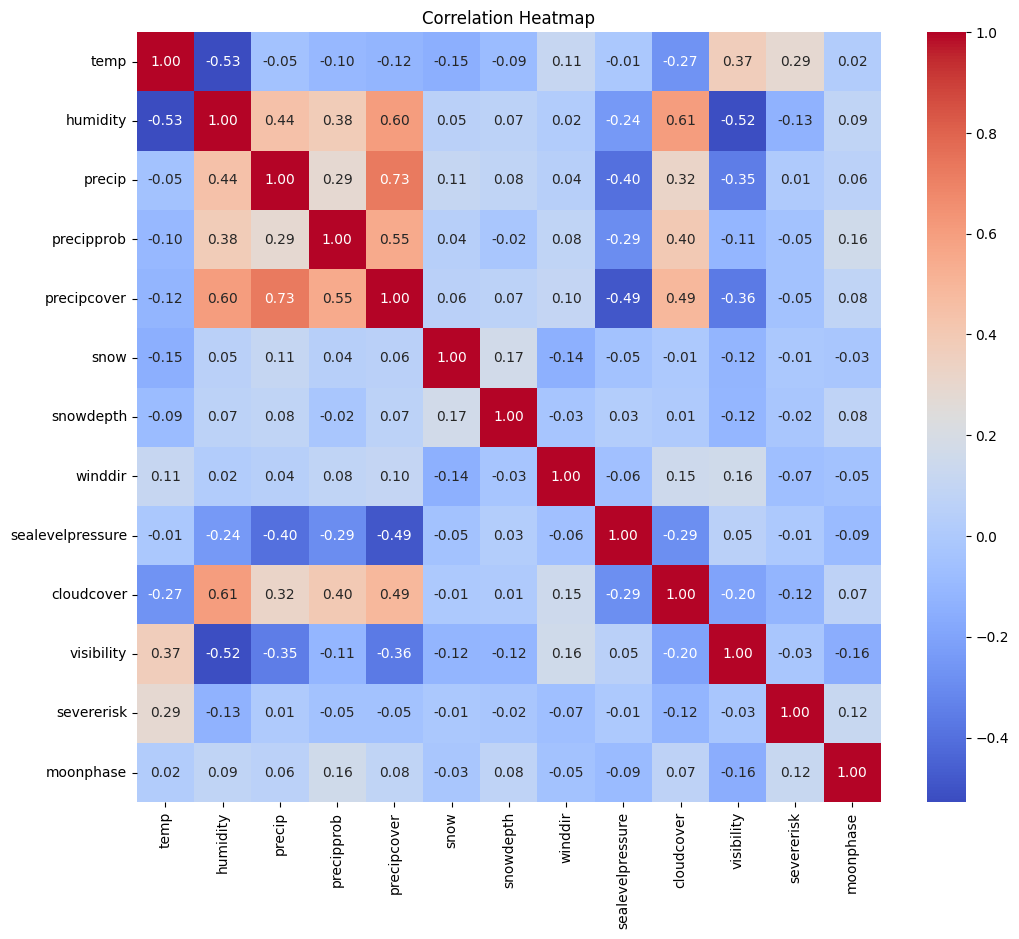

In [6]:

# Selecting numeric columns for correlation analysis
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Apply PML (here we using LinearRegression, XGBRegression and LGBMRegressor)


In [7]:
# Instantiate models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost Regressor": XGBRegressor(),
    "LightGBM Regressor": LGBMRegressor()
}

# Initialize an empty list to store results
results_table = []

# Train each model and evaluate on validation and test sets
for name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

     # Predictions for train, validation, and test
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Append results as a dictionary
    results_table.append({
        "Model": name,
        "Train RMSE": mean_squared_error(y_train, y_train_pred, squared=False),
        "Train R2": r2_score(y_train, y_train_pred),
        "Validation RMSE": mean_squared_error(y_val, y_val_pred, squared=False),
        "Validation R2": r2_score(y_val, y_val_pred),
        "Test RMSE": mean_squared_error(y_test, y_test_pred, squared=False),
        "Test R2": r2_score(y_test, y_test_pred),
    })

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 9
[LightGBM] [Info] Start training from score 13.807018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Result**

In [8]:
# Convert results list to a DataFrame for easy viewing
results_table_df = pd.DataFrame(results_table)

# Display the results DataFrame
print(results_table_df)

                Model  Train RMSE  Train R2  Validation RMSE  Validation R2  \
0   Linear Regression    4.087861  0.478497        15.818775      -5.595051   
1   XGBoost Regressor    0.005470  0.999999         4.622209       0.436918   
2  LightGBM Regressor    1.763247  0.902973         5.042452       0.329875   

   Test RMSE   Test R2  
0   4.370716  0.411233  
1   4.588846  0.351000  
2   4.832254  0.280323  


Conclusion 1:
* Linear Regression fails to capture the complexity of the data and overfits the training set while performing poorly on validation and test sets.
* XGBoost is highly overfits the training data but shows the best validation and test RMSE and R² scores, indicating a better ability to generalize compared to LightGBM and Linear Regression.
* LightGBM balances better balanced than Linear Regression and less overfitting than XGBoost. However, its test performance is slightly worse than XGBoost.

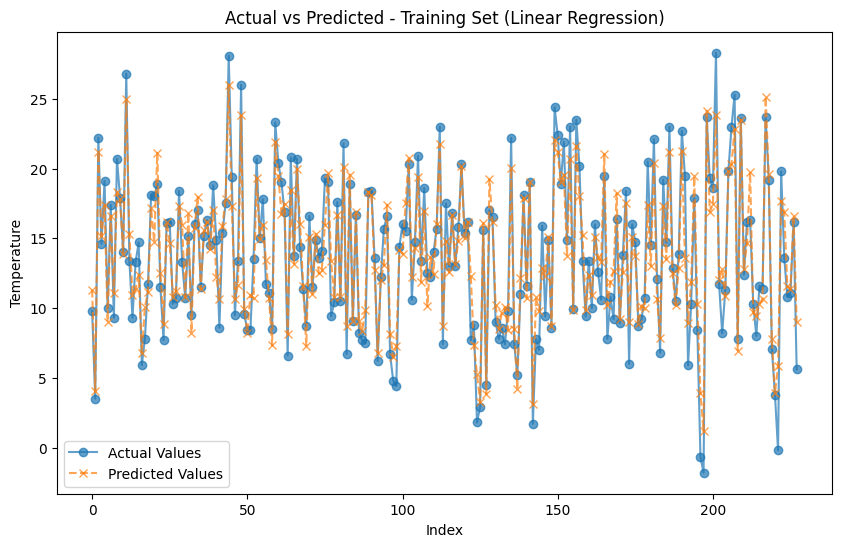

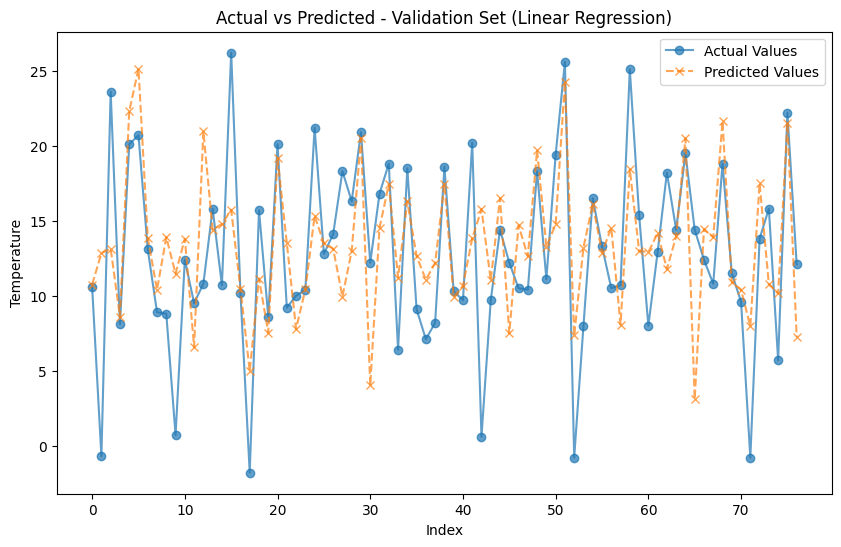

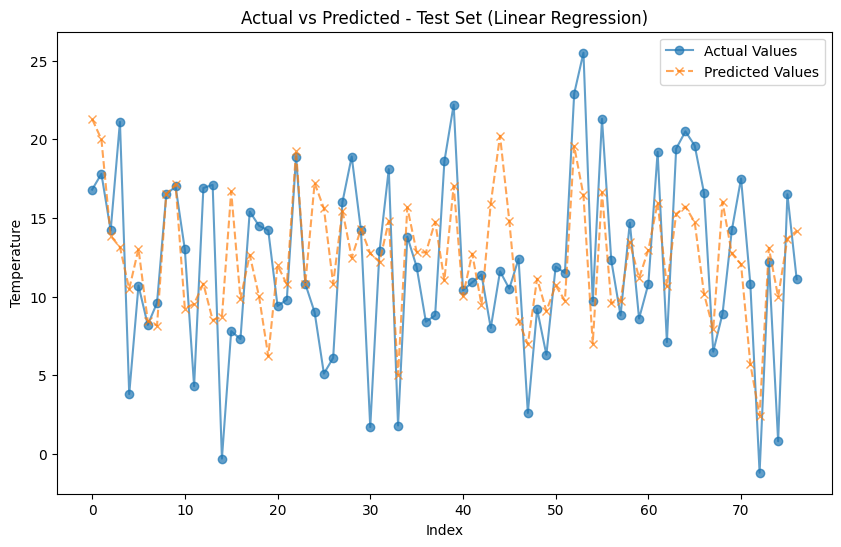

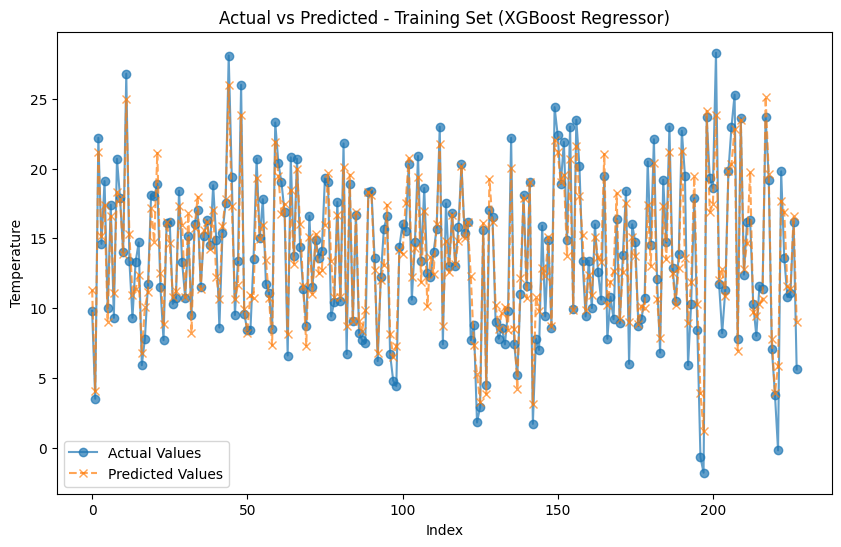

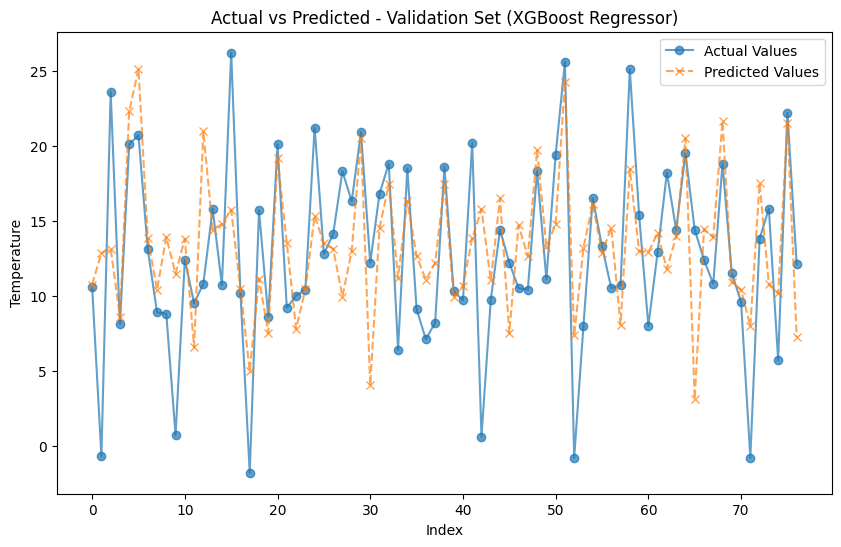

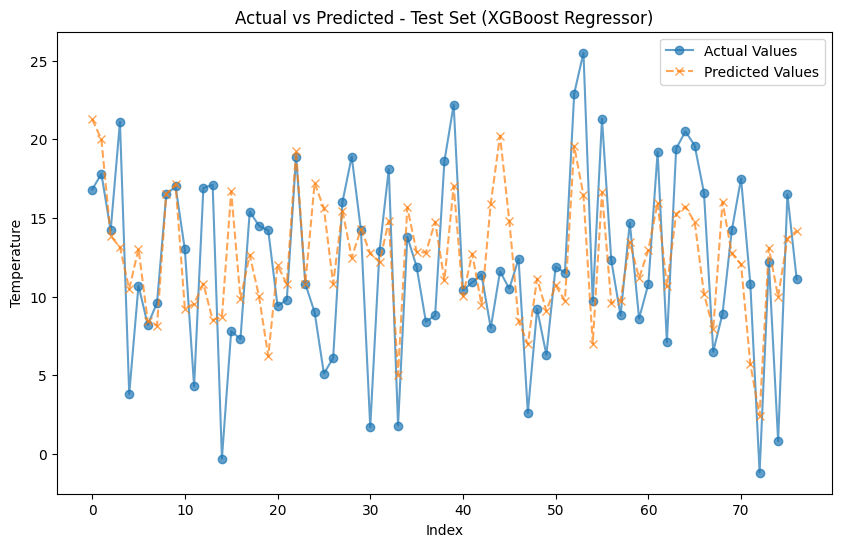

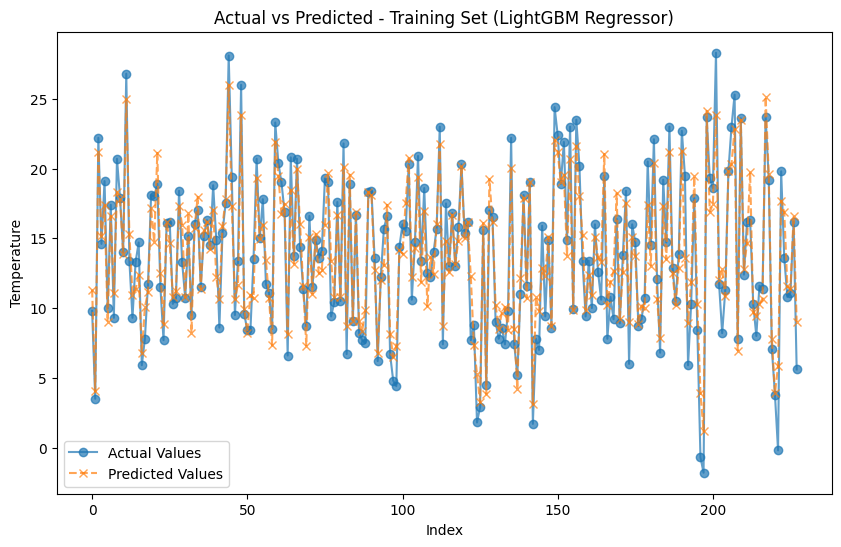

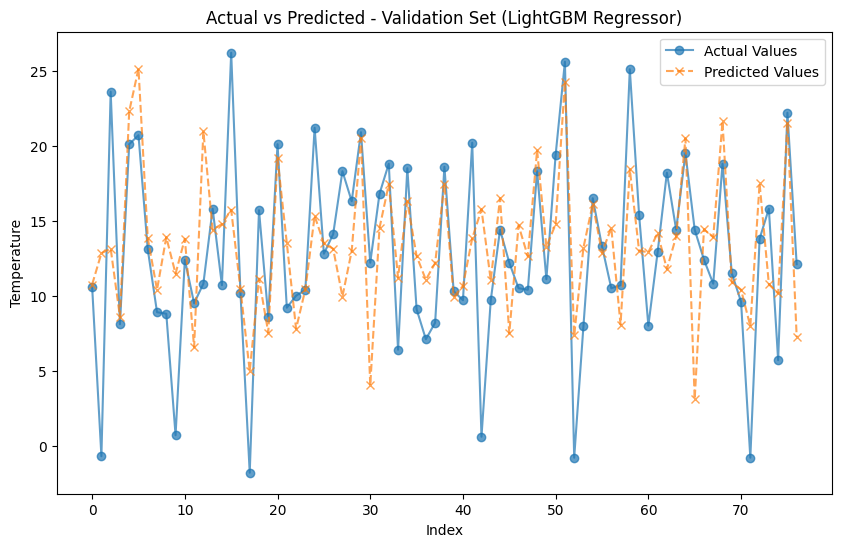

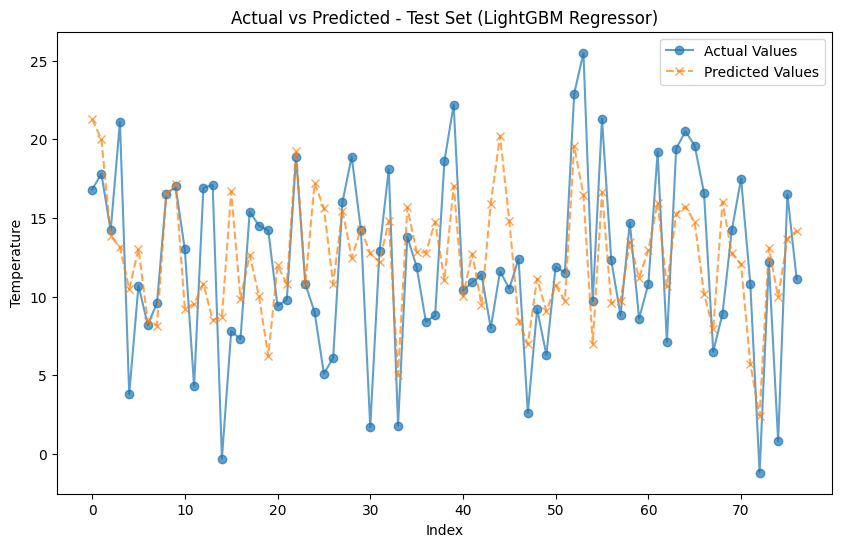

In [37]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, model_name, dataset_type):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(f"Actual vs Predicted - {dataset_type} Set ({model_name})")
    plt.legend()
    plt.show()

# Iterate through results for each model and plot
for result in results_table:
    model_name = result["Model"]

     # Predictions for train, validation, and test
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Plot for training set
    plot_actual_vs_predicted(y_train, y_train_pred, model_name, "Training")

    # Plot for validation set
    plot_actual_vs_predicted(y_val, y_val_pred, model_name, "Validation")

    # Plot for test set
    plot_actual_vs_predicted(y_test, y_test_pred, model_name, "Test")


**Hyper-parameter tuning for LightGBM and XGBoost**

In [9]:
# Initialize an empty list to collect results
results_list = []

### LightGBM with GridSearchCV
param_grid_lgbm = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
grid_search_lgbm = GridSearchCV(LGBMRegressor(), param_grid_lgbm, cv=3, scoring='neg_root_mean_squared_error')
grid_search_lgbm.fit(X_train, y_train)
best_model_lgbm = grid_search_lgbm.best_estimator_

# Predictions for validation and test sets
y_val_pred_lgbm = best_model_lgbm.predict(X_val)
y_test_pred_lgbm = best_model_lgbm.predict(X_test)

# Collect results for LightGBM with GridSearchCV
results_list.append({
    "Model": "LightGBM",
    "Tuning_Method": "GridSearchCV",
    "Validation RMSE": mean_squared_error(y_val, y_val_pred_lgbm, squared=False),
    "Validation R2": r2_score(y_val, y_val_pred_lgbm),
    "Test RMSE": mean_squared_error(y_test, y_test_pred_lgbm, squared=False),
    "Test R2": r2_score(y_test, y_test_pred_lgbm),
    "MAPE": mean_absolute_percentage_error(y_test, y_test_pred_lgbm)
})

### XGBoost with Optuna
def objective(trial):
    param = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    return mean_squared_error(y_val, y_val_pred, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best model from Optuna
best_model_xgb = XGBRegressor(**study.best_params)
best_model_xgb.fit(X_train, y_train)

# Predictions for validation and test sets
y_val_pred_xgb = best_model_xgb.predict(X_val)
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Collect results for XGBoost with Optuna
results_list.append({
    "Model": "XGBoost",
    "Tuning_Method": "Optuna",
    "Validation RMSE": mean_squared_error(y_val, y_val_pred_xgb, squared=False),
    "Validation R2": r2_score(y_val, y_val_pred_xgb),
    "Test RMSE": mean_squared_error(y_test, y_test_pred_xgb, squared=False),
    "Test R2": r2_score(y_test, y_test_pred_xgb),
    "MAPE": mean_absolute_percentage_error(y_test, y_test_pred_xgb)
})


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 9
[LightGBM] [Info] Start training from score 13.416447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-20 17:43:34,008] A new study created in memory with name: no-name-3f914fca-a3f3-47f6-89b2-e4eb81d5fbaf


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 9
[LightGBM] [Info] Start training from score 13.807018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

<ipython-input-9-e678a0347cca>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-11-20 17:43:35,230] Trial 0 finished with value: 4.6762740111871555 and parameters: {'learning_rate': 0.07053081059240156, 'max_depth': 8, 'n_estimators': 196}. Best is trial 0 with value: 4.6762740111871555.
<ipython-input-9-e678a0347cca>:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_

**Result after tuning**

In [12]:
# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results_list)

# Display the comparison results
print(results_table_df)
print('After tuning')
print(results_df)

                Model  Train RMSE  Train R2  Validation RMSE  Validation R2  \
0   Linear Regression    4.087861  0.478497        15.818775      -5.595051   
1   XGBoost Regressor    0.005470  0.999999         4.622209       0.436918   
2  LightGBM Regressor    1.763247  0.902973         5.042452       0.329875   

   Test RMSE   Test R2  
0   4.370716  0.411233  
1   4.588846  0.351000  
2   4.832254  0.280323  
After tuning
      Model Tuning_Method  Validation RMSE  Validation R2  Test RMSE  \
0  LightGBM  GridSearchCV         4.846096       0.381049   4.831079   
1   XGBoost        Optuna         4.387056       0.492754   4.506830   

    Test R2      MAPE  
0  0.280673  1.089010  
1  0.373991  0.951755  


Conclusion 2:
* After tuning, LightGBM shows a slight improvement on validation data. Test performance remains similar, suggesting limited room for further improvement.
* After tuning with Optuna, XGBoost shows noticeable improvement in both validation and test performance, outperforming LightGBM across all metrics.

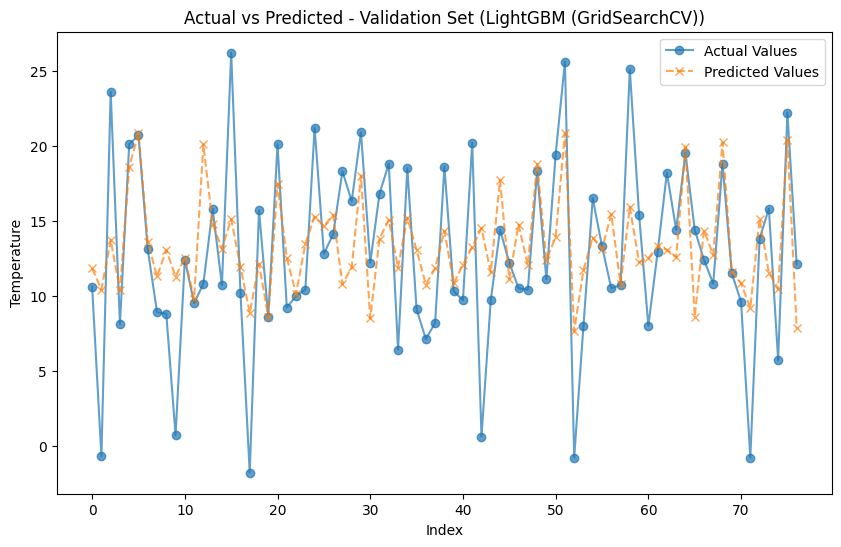

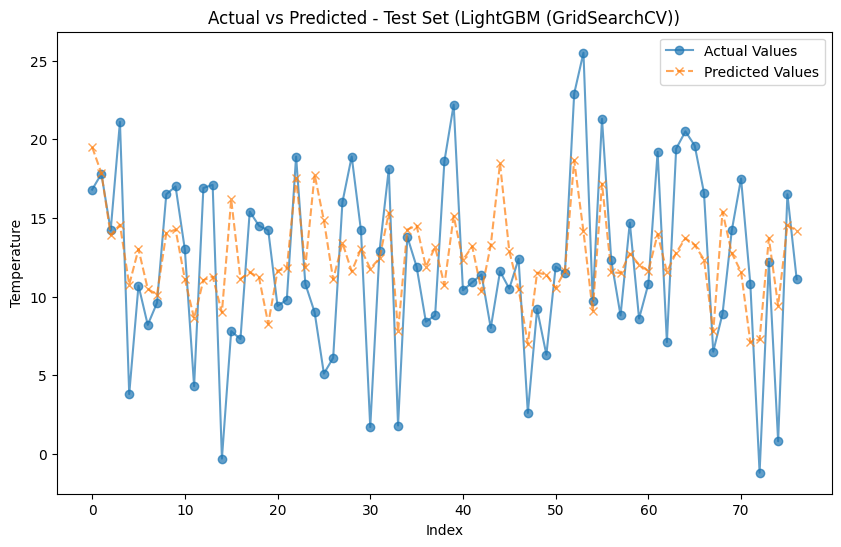

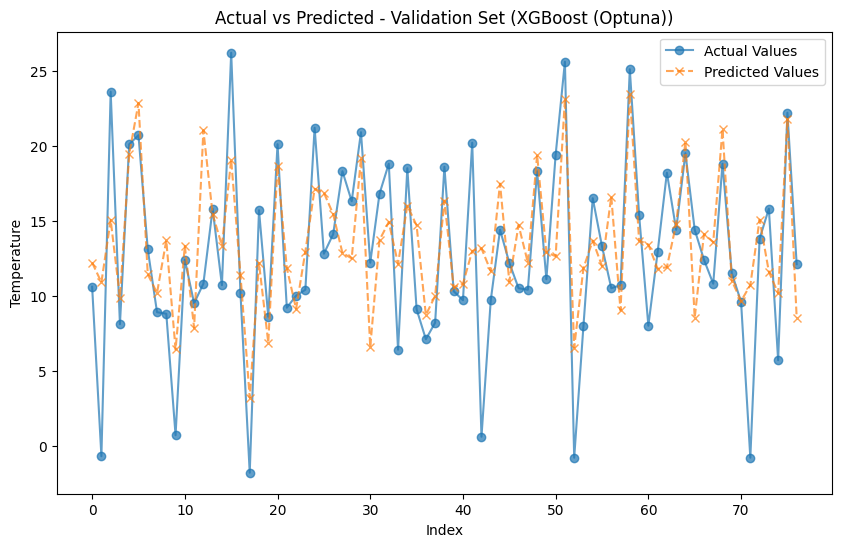

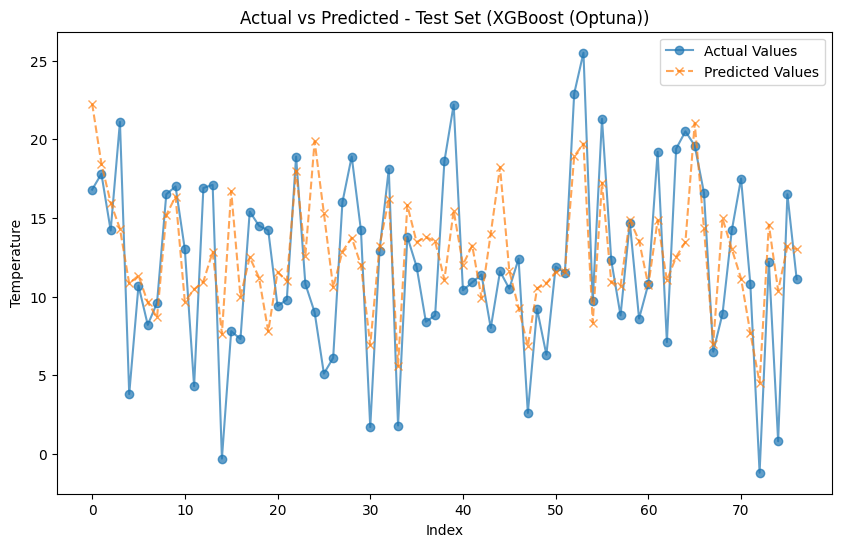

In [38]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, model_name, dataset_type):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(f"Actual vs Predicted - {dataset_type} Set ({model_name})")
    plt.legend()
    plt.show()

# LightGBM Plots
plot_actual_vs_predicted(y_val, y_val_pred_lgbm, "LightGBM (GridSearchCV)", "Validation")
plot_actual_vs_predicted(y_test, y_test_pred_lgbm, "LightGBM (GridSearchCV)", "Test")

# XGBoost Plots
plot_actual_vs_predicted(y_val, y_val_pred_xgb, "XGBoost (Optuna)", "Validation")
plot_actual_vs_predicted(y_test, y_test_pred_xgb, "XGBoost (Optuna)", "Test")


# **Ex6:**
In Question 5, normally you will make use of numerical features only. A bonus
point will be given to a team which can leverage categorical feature nicely to improve
the model performance.

**Preprocess one more time to fit with the Ex6's condition**


In [13]:
from sklearn.preprocessing import OneHotEncoder
df_ex6 = pd.read_csv('cleaned_paris_temperature.csv')
# Drop unnecessary columns
columns_to_drop = ['name', 'datetime', 'sunrise', 'sunset', 'description', 'stations']
df_ex6 = df_ex6.drop(columns=columns_to_drop, errors='ignore')

# One-Hot Encode categorical columns
categorical_cols = ['preciptype', 'conditions', 'icon']
df_ex6 = pd.get_dummies(df_ex6, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

#Split data
# Define features and target
target = 'temp'
X = df_ex6.drop(columns=[target])
y = df_ex6[target]

# Split the data into train+val and test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

**Train and evaluate the XGBoost**

In [14]:
# Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate on validation set
print("Results on Validation Set with XGBoost:")
print("RMSE:", mean_squared_error(y_val, y_val_pred, squared=False))
print("R2:", r2_score(y_val, y_val_pred))
print("MAPE:", mean_absolute_percentage_error(y_val, y_val_pred))

# Evaluate on test set
print("\nResults on Test Set with XGBoost:")
print("RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("R2:", r2_score(y_test, y_test_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))

Results on Validation Set with XGBoost:
RMSE: 0.4293043892057649
R2: 0.9951426081874841
MAPE: 0.1301219496467824

Results on Test Set with XGBoost:
RMSE: 0.4165505504137798
R2: 0.9946522212004844
MAPE: 0.14350559417144446


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


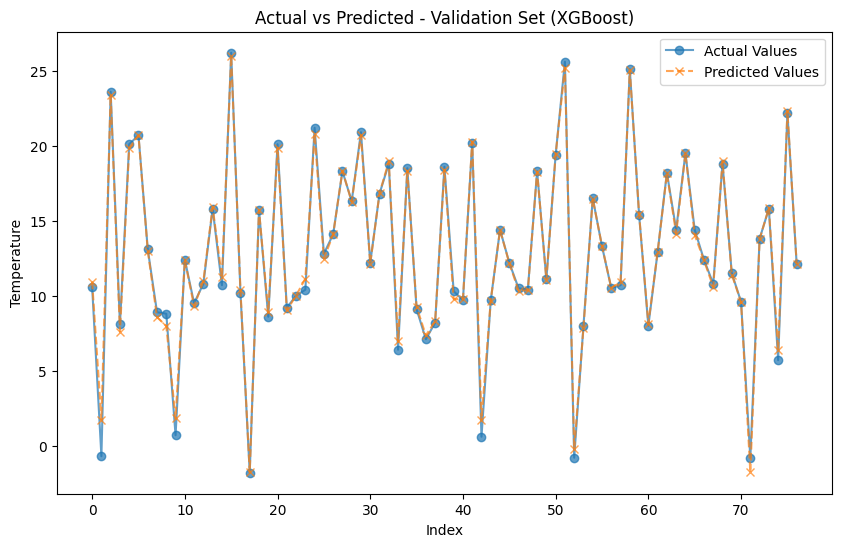

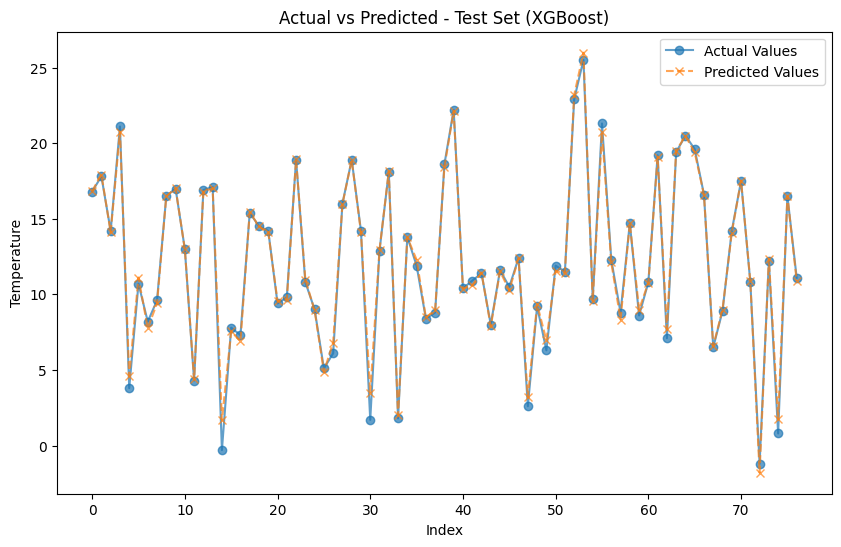

In [15]:
# Plot Actual vs Predicted for Validation and Test Sets
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual.values, label='Actual Values', marker='o', linestyle='-', alpha=0.7)
    plt.plot(y_pred, label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Validation Set (XGBoost)
plot_actual_vs_predicted(y_val, y_val_pred, "Actual vs Predicted - Validation Set (XGBoost)")

# Plot for Test Set (XGBoost)
plot_actual_vs_predicted(y_test, y_test_pred, "Actual vs Predicted - Test Set (XGBoost)")

# **Ex7: LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('cleaned_paris_temperature.csv')
data_cleaned = df.drop(columns=['preciptype', 'stations'])
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['datetime'])

data_values = data_cleaned['temp'].values

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned[['temp']])

In [ ]:
train_end_date = '2024-09-15'
test_start_date = '2024-09-16'
sequences_length = 30

In [ ]:
train_data = data_scaled[data_cleaned['datetime'] <= train_end_date]
test_start_index = data_cleaned['datetime'][data_cleaned['datetime'] == test_start_date].index[0]
test_start_index = max(0, test_start_index - sequences_length)
test_data = data_scaled[test_start_index:]

In [ ]:
def create_sequences(data_value, sequences_length):
    X, y = [], []
    for i in range(len(data_value) - sequences_length):
        X.append(data_value[i:i+sequences_length, 0])
        y.append(data_value[i+sequences_length, 0])
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = create_sequences(train_data, sequences_length)
X_test, y_test = create_sequences(test_data, sequences_length)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], 1), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=30)
history= model.fit(X_train, y_train, epochs=100, batch_size=16, callbacks=[early_stopping])

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 1.6453
Epoch 2/100
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0683

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.9596
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.5666
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.3292
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1950
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1168
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0702
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0511
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0343
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0433
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0322
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0290
Epoch 13/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0234
Epoch 14/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0213
Epoch 15/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0244
Epoch 16/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0216


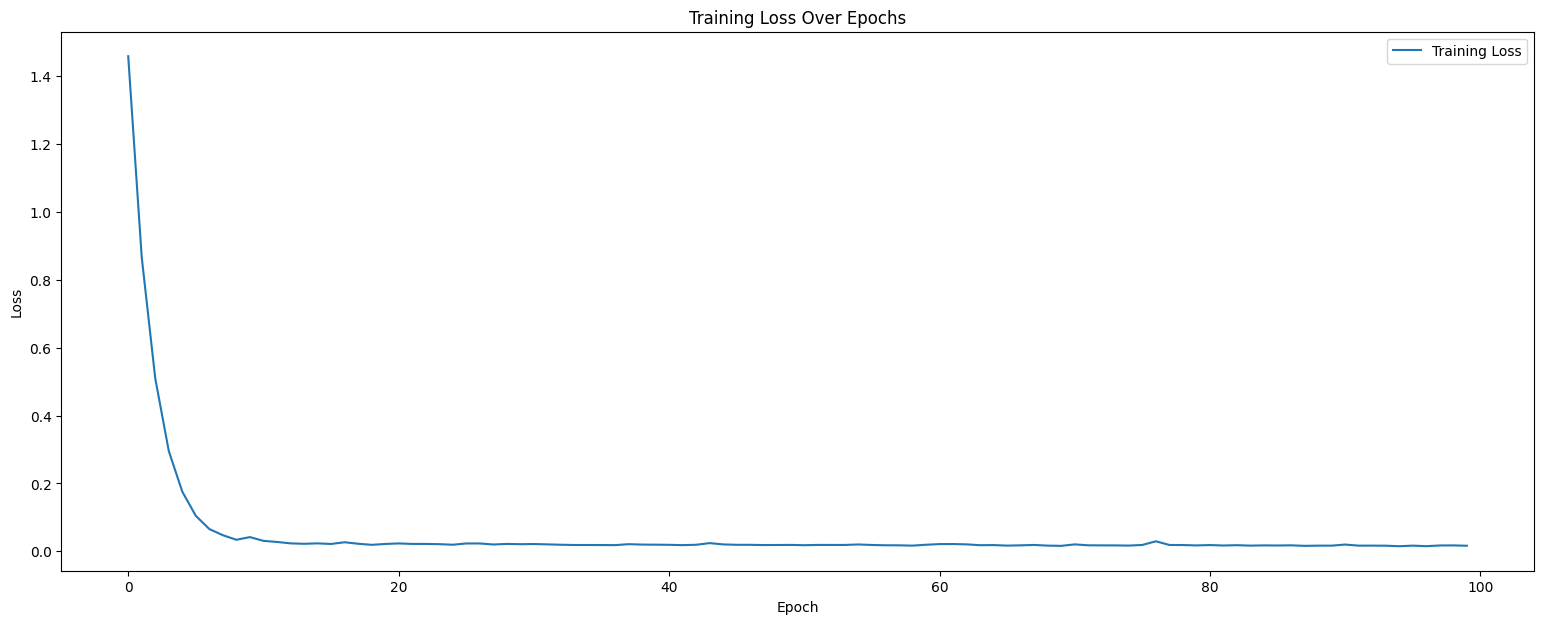

In [ ]:
loss = history.history['loss']
plt.figure(figsize=(19,7))
plt.plot(loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
test_predict = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


In [ ]:
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predict.flatten()})
print(comparison_df)

    Actual  Predicted
0     16.2  15.973798
1     16.6  15.453263
2     18.6  15.102139
3     20.1  14.968750
4     18.6  15.089728
5     19.0  15.424725
6     18.0  15.905251
7     15.4  16.445534
8     14.9  16.933954
9     14.5  17.306173
10    15.8  17.487585
11    13.0  17.486383
12    10.7  17.281187
13     9.1  16.872141
14    14.5  16.262299
15    13.9  15.557701
16    14.1  14.836454
17    11.9  14.203317
18    10.4  13.679210
19    10.7  13.256237
20    12.4  12.937683
21    16.3  12.725589
22    16.5  12.685420
23    14.7  12.837067
24    16.0  13.127121
25    13.3  13.524205
26    10.8  13.930640
27     8.9  14.236355
28     9.2  14.348076
29    11.1  14.232046
30    11.5  13.921089


In [ ]:
score_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

print('RMSE: {}'.format(score_rmse))

RMSE: 3.398544737257882


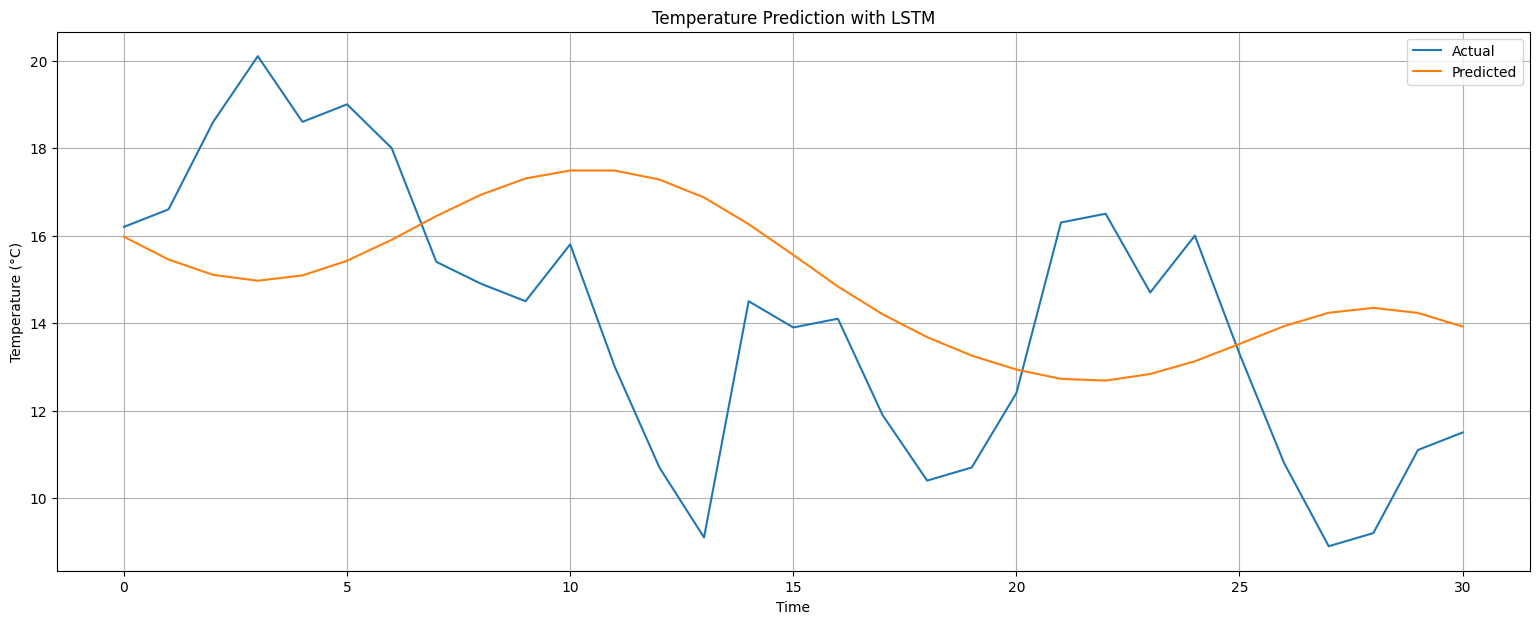

In [ ]:
plt.figure(figsize=(19, 7))
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()